In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

df = pd.read_csv("fimal_result (2).csv",encoding='cp949')

C:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1827 non-null   int64  
 1   date              1827 non-null   object 
 2   일누적 자외선 A(MJ/m2)  1827 non-null   float64
 3   일최대 자외선 B(W/m2 )  1827 non-null   float64
 4   평균 오존전량(DU)       1827 non-null   float64
 5   미세머지_10           1827 non-null   float64
 6   미세머지_11           1827 non-null   float64
 7   미세머지_12           1827 non-null   float64
 8   미세머지_13           1827 non-null   float64
 9   미세머지_14           1827 non-null   float64
 10  운량_10             1827 non-null   float64
 11  운량_11             1827 non-null   float64
 12  운량_12             1827 non-null   float64
 13  운량_13             1827 non-null   float64
 14  운량_14             1827 non-null   float64
 15  총자외선지수 일최고값       1827 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory

In [3]:
z = df['일최대 자외선 B(W/m2 )']*df['평균 오존전량(DU)']

In [4]:
#오존 -999을 nan로 변경 
df = pd.read_csv("fimal_result (2).csv",encoding='cp949')
df = df.replace(-999, np.NaN)


In [5]:
df.head(10)

,Unnamed: 0,date,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),미세머지_10,미세머지_11,미세머지_12,미세머지_13,미세머지_14,운량_10,운량_11,운량_12,운량_13,운량_14,총자외선지수 일최고값
0,0,2012-01-01,0.16,0.028,NaN,71.0,68.0,70.0,71.0,24.0,10.0,10.0,10.0,10.0,10.0,1.5
1,1,2012-01-02,0.21,0.032,NaN,89.0,74.0,82.0,105.0,73.0,8.0,7.0,7.0,4.0,6.0,1.6
2,2,2012-01-03,0.21,0.043,NaN,64.0,50.0,49.0,50.0,33.0,8.0,8.0,8.0,10.0,10.0,2.2
3,3,2012-01-04,0.25,0.034,NaN,45.0,53.0,63.0,50.0,45.0,6.0,7.0,7.0,8.0,8.0,1.7
4,4,2012-01-05,0.41,0.052,NaN,39.0,37.0,47.0,35.0,33.0,1.0,3.0,7.0,8.0,8.0,2.6
5,5,2012-01-06,0.35,0.051,NaN,32.0,23.0,43.0,36.0,38.0,4.0,6.0,3.0,6.0,5.0,2.6
6,6,2012-01-07,0.46,0.055,NaN,56.0,56.0,48.0,37.0,32.0,0.0,0.0,0.0,0.0,0.0,2.8
7,7,2012-01-08,0.31,0.041,NaN,43.0,44.0,37.0,31.0,28.0,0.0,0.0,5.0,8.0,8.0,2.0
8,8,2012-01-09,0.15,0.018,NaN,72.0,68.0,68.0,72.0,88.0,9.0,9.0,9.0,9.0,9.0,0.9
9,9,2012-01-10,0.40,0.052,NaN,65.0,61.0,60.0,53.0,57.0,0.0,0.0,0.0,0.0,0.0,2.6


In [6]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
df = pd.read_csv("fimal_result (2).csv",encoding='cp949')
df = df.replace(-999, np.NaN)
df_drop_row = df.dropna(axis=0)  #결측값있는 행제거 
df_drop_row

# X and y after excluding missing values
X=df_drop_row[['총자외선지수 일최고값']]
ozon=df_drop_row[['평균 오존전량(DU)']]
mi10=df_drop_row[['미세머지_10']]
mi11=df_drop_row[['미세머지_11']]
mi12=df_drop_row[['미세머지_12']]
mi13=df_drop_row[['미세머지_13']]
mi14=df_drop_row[['미세머지_14']]
cloud10=df_drop_row[['운량_10']]
cloud11=df_drop_row[['운량_11']]
cloud12=df_drop_row[['운량_12']]
cloud13=df_drop_row[['운량_13']]
cloud14=df_drop_row[['운량_14']]

# fitting linear regression model using non-missing values
lin_reg_model = lin_reg.fit(X, ozon)
lin_reg_model1 = lin_reg.fit(X, mi10)
lin_reg_model2 = lin_reg.fit(X, mi11)
lin_reg_model3 = lin_reg.fit(X, mi12)
lin_reg_model4 = lin_reg.fit(X, mi13)
lin_reg_model5 = lin_reg.fit(X, mi14)
lin_reg_model11 = lin_reg.fit(X, cloud10)
lin_reg_model12 = lin_reg.fit(X, cloud11)
lin_reg_model13 = lin_reg.fit(X, cloud12)
lin_reg_model14 = lin_reg.fit(X, cloud13)
lin_reg_model15 = lin_reg.fit(X, cloud14)

#선형회귀모형으로 부터 추정값 계산하기 (prediction using linear regression model)
y_pred = lin_reg_model.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred1 = lin_reg_model1.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred2 = lin_reg_model2.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred3 = lin_reg_model3.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred4 = lin_reg_model4.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred5 = lin_reg_model5.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred11 = lin_reg_model11.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred12 = lin_reg_model12.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred13 = lin_reg_model13.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred14 = lin_reg_model14.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])
y_pred15 = lin_reg_model15.predict(df_drop_row.loc[:, ['총자외선지수 일최고값']])


df['평균 오존전량(DU)'].fillna(pd.Series(y_pred.flatten()), inplace=True) #결측값 채우기 
df['미세머지_10'].fillna(pd.Series(y_pred1.flatten()), inplace=True)
df['미세머지_11'].fillna(pd.Series(y_pred2.flatten()), inplace=True)
df['미세머지_12'].fillna(pd.Series(y_pred3.flatten()), inplace=True)
df['미세머지_13'].fillna(pd.Series(y_pred4.flatten()), inplace=True)
df['미세머지_14'].fillna(pd.Series(y_pred5.flatten()), inplace=True)
df['운량_10'].fillna(pd.Series(y_pred1.flatten()), inplace=True)
df['운량_11'].fillna(pd.Series(y_pred2.flatten()), inplace=True)
df['운량_12'].fillna(pd.Series(y_pred3.flatten()), inplace=True)
df['운량_13'].fillna(pd.Series(y_pred4.flatten()), inplace=True)
df['운량_14'].fillna(pd.Series(y_pred5.flatten()), inplace=True)

In [7]:
df

,Unnamed: 0,date,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),미세머지_10,미세머지_11,미세머지_12,미세머지_13,미세머지_14,운량_10,운량_11,운량_12,운량_13,운량_14,총자외선지수 일최고값
0,0,2012-01-01,0.16,0.028,4.796097,71.0,68.0,70.0,71.0,24.0,10.0,10.0,10.0,10.0,10.0,1.5
1,1,2012-01-02,0.21,0.032,4.783525,89.0,74.0,82.0,105.0,73.0,8.0,7.0,7.0,4.0,6.0,1.6
2,2,2012-01-03,0.21,0.043,4.749999,64.0,50.0,49.0,50.0,33.0,8.0,8.0,8.0,10.0,10.0,2.2
3,3,2012-01-04,0.25,0.034,4.791906,45.0,53.0,63.0,50.0,45.0,6.0,7.0,7.0,8.0,8.0,1.7
4,4,2012-01-05,0.41,0.052,4.770953,39.0,37.0,47.0,35.0,33.0,1.0,3.0,7.0,8.0,8.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1822,2016-12-27,0.38,0.054,282.000000,31.0,31.0,35.0,32.0,33.0,8.0,0.0,0.0,0.0,0.0,2.7
1823,1823,2016-12-28,0.38,0.053,285.600000,28.0,29.0,30.0,34.0,39.0,0.0,0.0,0.0,0.0,0.0,2.6
1824,1824,2016-12-29,0.39,0.048,318.600000,39.0,38.0,36.0,36.0,23.0,1.0,1.0,0.0,0.0,0.0,2.4
1825,1825,2016-12-30,0.33,0.043,345.600000,24.0,22.0,21.0,16.0,17.0,2.0,3.0,5.0,3.0,4.0,2.2


In [8]:
#아예 관측안한날 결측값이므로 제거
df_new = df.dropna(axis=0)
df_new

,Unnamed: 0,date,일누적 자외선 A(MJ/m2),일최대 자외선 B(W/m2 ),평균 오존전량(DU),미세머지_10,미세머지_11,미세머지_12,미세머지_13,미세머지_14,운량_10,운량_11,운량_12,운량_13,운량_14,총자외선지수 일최고값
0,0,2012-01-01,0.16,0.028,4.796097,71.0,68.0,70.0,71.0,24.0,10.0,10.0,10.0,10.0,10.0,1.5
1,1,2012-01-02,0.21,0.032,4.783525,89.0,74.0,82.0,105.0,73.0,8.0,7.0,7.0,4.0,6.0,1.6
2,2,2012-01-03,0.21,0.043,4.749999,64.0,50.0,49.0,50.0,33.0,8.0,8.0,8.0,10.0,10.0,2.2
3,3,2012-01-04,0.25,0.034,4.791906,45.0,53.0,63.0,50.0,45.0,6.0,7.0,7.0,8.0,8.0,1.7
4,4,2012-01-05,0.41,0.052,4.770953,39.0,37.0,47.0,35.0,33.0,1.0,3.0,7.0,8.0,8.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1820,2016-12-25,0.31,0.040,317.900000,63.0,58.0,56.0,57.0,42.0,0.0,0.0,2.0,6.0,8.0,2.0
1822,1822,2016-12-27,0.38,0.054,282.000000,31.0,31.0,35.0,32.0,33.0,8.0,0.0,0.0,0.0,0.0,2.7
1823,1823,2016-12-28,0.38,0.053,285.600000,28.0,29.0,30.0,34.0,39.0,0.0,0.0,0.0,0.0,0.0,2.6
1824,1824,2016-12-29,0.39,0.048,318.600000,39.0,38.0,36.0,36.0,23.0,1.0,1.0,0.0,0.0,0.0,2.4


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


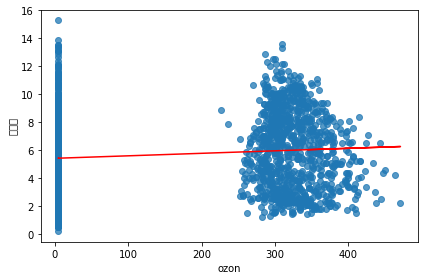

In [9]:
#결측값 채운뒤 확인 
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
 
자외선 = df_new['총자외선지수 일최고값']
오존 = df_new['평균 오존전량(DU)']

plt.scatter(오존, 자외선 ,alpha=0.75)

plt.ylabel('자외선')
plt.xlabel('ozon')


line_fitter = LinearRegression()
line_fitter.fit(오존.values.reshape(-1,1), 자외선)
plt.plot(오존,line_fitter.predict(오존.values.reshape(-1,1)),'r')
plt.tight_layout()
plt.show()

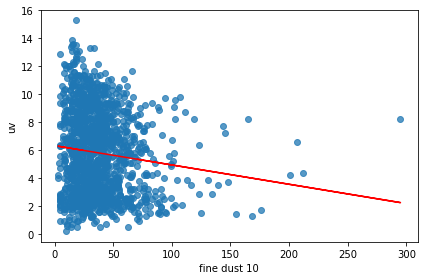

In [10]:
#결측값 채운뒤 확인 
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
 
자외선 = df_new['총자외선지수 일최고값']
mi10 = df_new['미세머지_10']

plt.scatter(mi10, 자외선 ,alpha=0.75)

plt.ylabel('uv')
plt.xlabel('fine dust 10')


line_fitter = LinearRegression()
line_fitter.fit(mi10.values.reshape(-1,1), 자외선)
plt.plot(mi10,line_fitter.predict(mi10.values.reshape(-1,1)),'r')
plt.tight_layout()
plt.show()

In [13]:
df_new.to_csv("full_result.csv")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

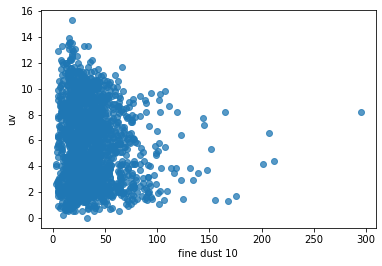

In [11]:
#결측값 채우기전 미세먼지10 na값으로 산점도를 그릴수없음 (에러발생)
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
 
자외선 = df['총자외선지수 일최고값']
mi10 = df['미세머지_10']

plt.scatter(mi10, 자외선 ,alpha=0.75)

plt.ylabel('uv')
plt.xlabel('fine dust 10')


line_fitter = LinearRegression()
line_fitter.fit(mi10.values.reshape(-1,1), 자외선)
plt.plot(mi10,line_fitter.predict(mi10.values.reshape(-1,1)),'r')
plt.tight_layout()
plt.show()